## 크롤링

In [101]:
from bs4 import BeautifulSoup as bs
from urllib.request import Request,urlopen
import pandas as pd

In [102]:
# 맨 뒤 번호 읽어오기.
url='https://finance.naver.com/item/sise_day.nhn?code=068270'

req=Request(url)
req.add_header('User-Agent','Mozilla/5.0')
with urlopen(req) as doc:
    html=bs(doc,'lxml')
    pgrr=html.select_one("body td.pgRR")
    last_value = pgrr.a["href"].split("=")
last_page = last_value[-1]
print(last_page)

396


In [112]:
import pandas as pd
from urllib import request as req
from bs4 import BeautifulSoup as bs

#네이버 금융 웹 스프랩핑 , 파이썬 증권 데이터 분석참조, [ekyoo]
#-----install 해야할것들-----
#pip install beautifulsoup4
#pip install lxml
#pip install html5lib
#pip install pandas
#---------------------------

# http://m.avalon.co.kr/check.html 에서 user agent정보를 넣어준다. user agent 정보를 넣지 않으면 네이버 금융 웹크롤링 차단됨.
headers=('User-Agent','Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/89.0.4389.82 Safari/537.36') 
url = 'https://finance.naver.com/item/sise_day.nhn?code=068270' # 035720=카카오 종목코드


opener = req.build_opener()
opener.addheaders = [headers]
response=opener.open(url)
doc=bs(response,'lxml')
last_page = doc.find('td',class_='pgRR').a['href'].split('=')[-1]
print('총페이지 : '+last_page)


df=pd.DataFrame()
for page in range(1, 50): # int(last_page)+1
    page_url='{}&page={}'.format(url,page)
    response=opener.open(page_url)
    df=df.append(pd.read_html(response,header=0)[0])
    print('{}페이지 데이터 추가'.format(page))

총페이지 : 396
1페이지 데이터 추가
2페이지 데이터 추가
3페이지 데이터 추가
4페이지 데이터 추가
5페이지 데이터 추가
6페이지 데이터 추가
7페이지 데이터 추가
8페이지 데이터 추가
9페이지 데이터 추가
10페이지 데이터 추가
11페이지 데이터 추가
12페이지 데이터 추가
13페이지 데이터 추가
14페이지 데이터 추가
15페이지 데이터 추가
16페이지 데이터 추가
17페이지 데이터 추가
18페이지 데이터 추가
19페이지 데이터 추가
20페이지 데이터 추가
21페이지 데이터 추가
22페이지 데이터 추가
23페이지 데이터 추가
24페이지 데이터 추가
25페이지 데이터 추가
26페이지 데이터 추가
27페이지 데이터 추가
28페이지 데이터 추가
29페이지 데이터 추가
30페이지 데이터 추가
31페이지 데이터 추가
32페이지 데이터 추가
33페이지 데이터 추가
34페이지 데이터 추가
35페이지 데이터 추가
36페이지 데이터 추가
37페이지 데이터 추가
38페이지 데이터 추가
39페이지 데이터 추가
40페이지 데이터 추가
41페이지 데이터 추가
42페이지 데이터 추가
43페이지 데이터 추가
44페이지 데이터 추가
45페이지 데이터 추가
46페이지 데이터 추가
47페이지 데이터 추가
48페이지 데이터 추가
49페이지 데이터 추가


In [83]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 735 entries, 0 to 14
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   날짜      490 non-null    object 
 1   종가      490 non-null    float64
 2   전일비     490 non-null    float64
 3   시가      490 non-null    float64
 4   고가      490 non-null    float64
 5   저가      490 non-null    float64
 6   거래량     490 non-null    float64
dtypes: float64(6), object(1)
memory usage: 45.9+ KB


## 종가 차트 그리기

In [104]:
import pandas as pd
from urllib.request import urlopen
from bs4 import BeautifulSoup
from matplotlib import pyplot as plt

In [105]:
# 데이터 가공
df = df.dropna()
df = df.iloc[0:30]
df = df.sort_values(by="날짜")
display(df)

,날짜,종가,전일비,시가,고가,저가,거래량
13,2021.05.31,274500.0,1000.0,275000.0,278000.0,274000.0,432928.0
12,2021.06.01,272500.0,2000.0,274500.0,275500.0,270000.0,329654.0
11,2021.06.02,266500.0,6000.0,271500.0,272500.0,266500.0,539104.0
10,2021.06.03,266500.0,0.0,266000.0,272000.0,264000.0,510966.0
9,2021.06.04,267000.0,500.0,265500.0,268500.0,263000.0,456306.0
5,2021.06.07,264500.0,2500.0,268000.0,269500.0,263500.0,350960.0
4,2021.06.08,269000.0,4500.0,265000.0,271000.0,265000.0,545001.0
3,2021.06.09,261500.0,7500.0,270500.0,271500.0,261500.0,604854.0
2,2021.06.10,265500.0,4000.0,263500.0,267000.0,261000.0,557630.0
1,2021.06.11,265500.0,0.0,267000.0,271500.0,264500.0,488250.0


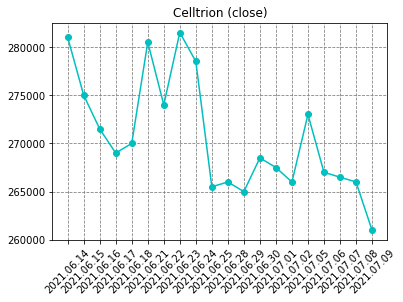

In [57]:
plt.title("Celltrion (close)")
plt.xticks(rotation=45)
plt.plot(df["날짜"], df["종가"], "co-")
plt.grid(color="gray", linestyle="--")
plt.show()

## 캔들 차트 그리기

In [109]:
import mplfinance as mpf

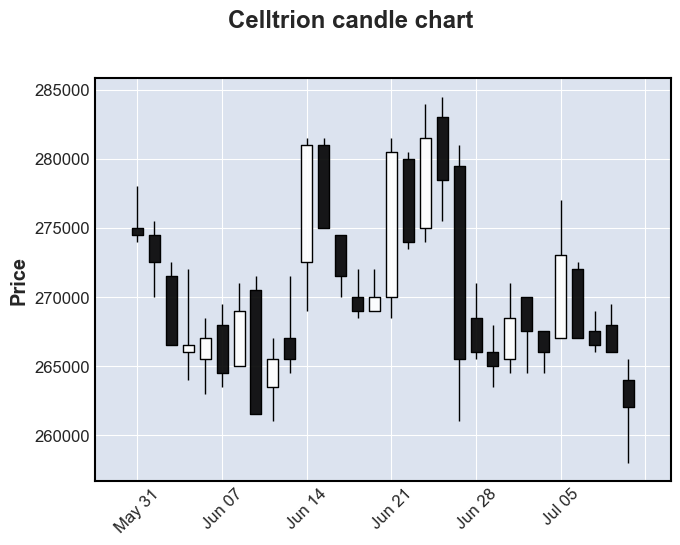

In [113]:
df = df.dropna()
df = df.iloc[0:30]
df = df.rename(columns={"날짜":"Date", "시가":"Open", "고가":"High", "저가":"Low", "종가":"Close", "거래량":"Volume"})
df = df.sort_values(by="Date")
df.index = pd.to_datetime(df.Date)
df = df[["Open", "High", "Low", "Close", "Volume"]]
mpf.plot(df, title="Celltrion candle chart", type="candle")
# mpf.plot(df, title="Celltrion ohlc chart", type="ohlc")

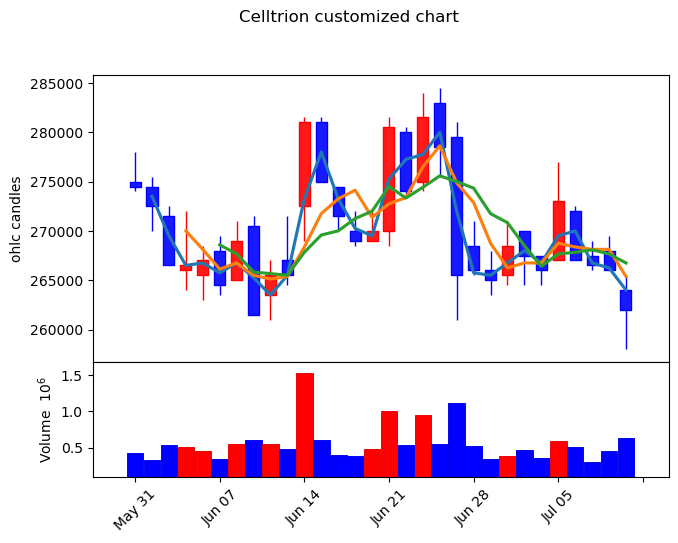

In [100]:
kwargs = dict(title="Celltrion customized chart",
             type="candle",
             mav=(2,4,6),
             volume=True,
             ylabel="ohlc candles")
mc = mpf.make_marketcolors(up="r", down="b", inherit=True)
s = mpf.make_mpf_style(marketcolors=mc)
mpf.plot(df, **kwargs, style=s)